# Final Code


In [ ]:
!pip install opencv-python mediapipe
import cv2
import mediapipe as mp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 42.6 MB/s eta 0:00:00


Loading image: /content/Image A.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/Image A_annotated.png
Posture analysis for /content/Image A.png: Wrong posture. Sit upright, keep your back straight, and avoid leaning forward.


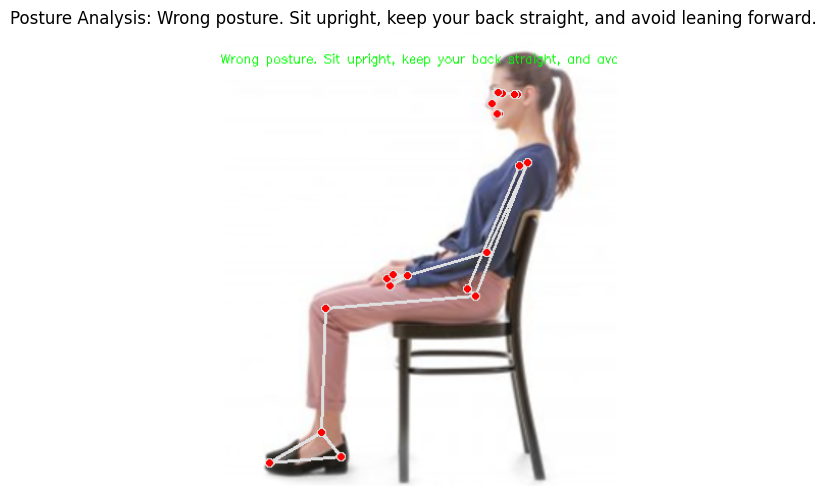

Loading image: /content/Image B.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/Image B_annotated.png
Posture analysis for /content/Image B.png: Wrong posture. Sit upright, keep your back straight, and avoid leaning forward.


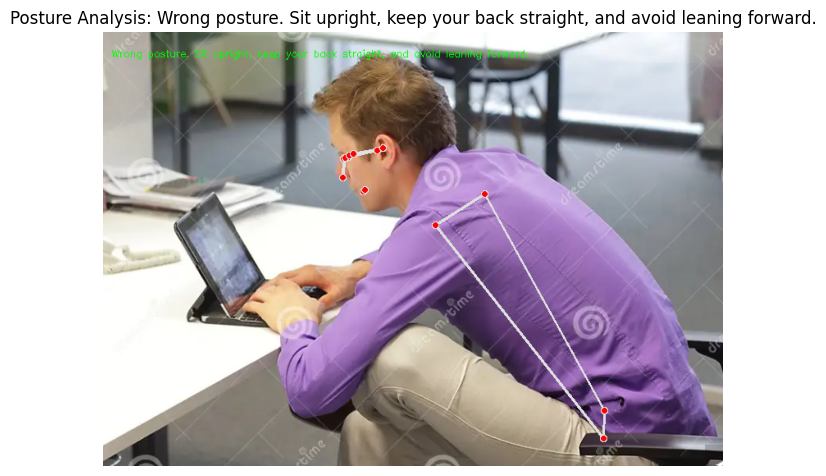

Loading image: /content/Image C.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/Image C_annotated.png
Posture analysis for /content/Image C.png: Wrong posture. Sit upright, keep your back straight, and avoid leaning forward.


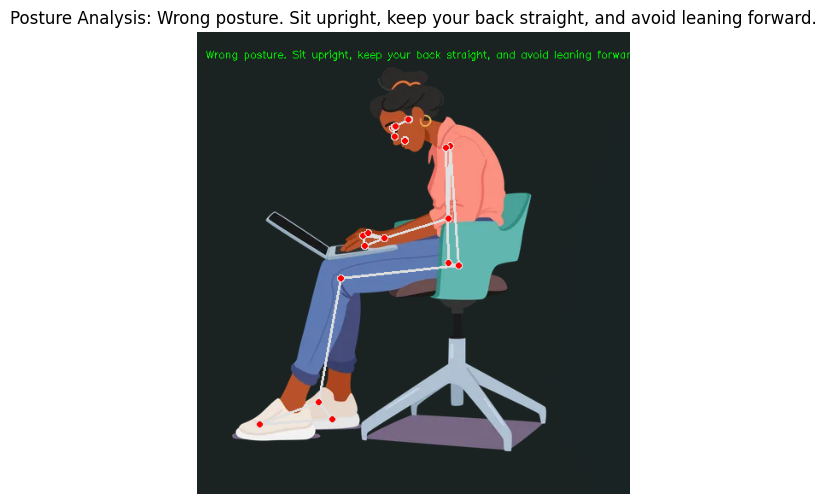

Loading image: /content/Image D.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/Image D_annotated.png
Posture analysis for /content/Image D.png: Wrong posture. Sit upright, keep your back straight, and avoid leaning forward.


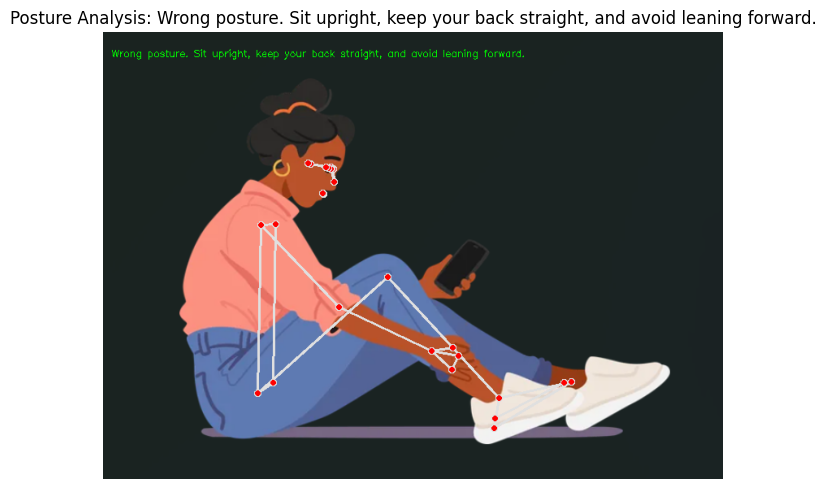

Loading image: /content/Image H.png
Processing pose landmarks...
No pose landmarks detected.
Annotated image saved at: /content/Image H_annotated.png
Posture analysis for /content/Image H.png: No human detected in the image.


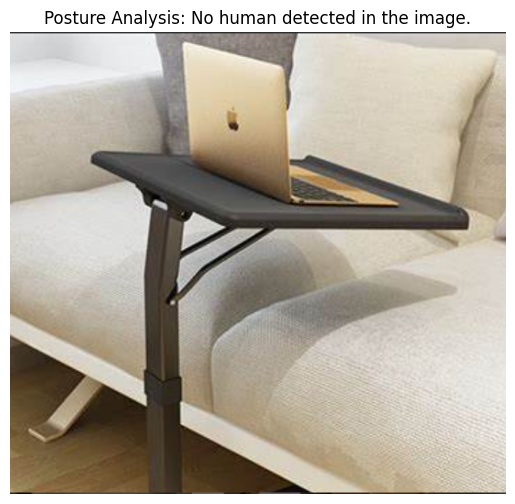

Loading image: /content/a.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/a_annotated.png
Posture analysis for /content/a.png: Correct posture


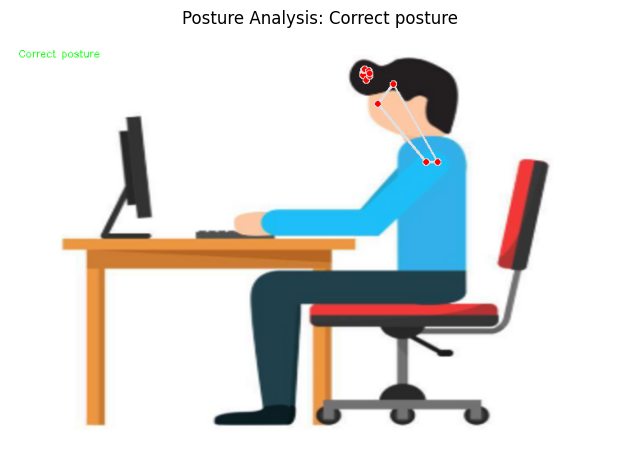

Loading image: /content/b.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/b_annotated.png
Posture analysis for /content/b.png: Correct posture


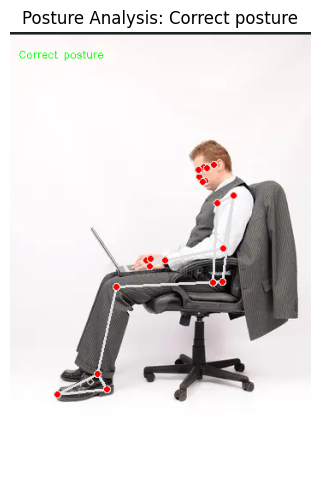

Loading image: /content/c.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/c_annotated.png
Posture analysis for /content/c.png: Correct posture


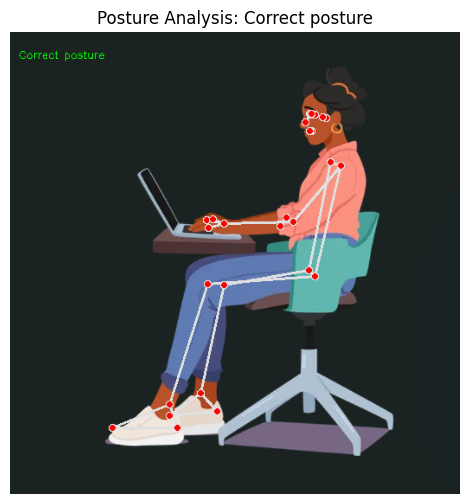

Loading image: /content/d.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/d_annotated.png
Posture analysis for /content/d.png: Correct posture


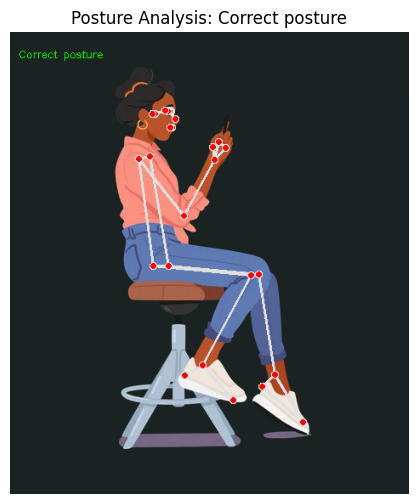

In [ ]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

def analyze_posture(image_path):
    # Load the image
    print(f"Loading image: {image_path}")
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return "Image not found or invalid", None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize MediaPipe Pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)

    # Process the image to detect pose landmarks
    print("Processing pose landmarks...")
    result = pose.process(image_rgb)
    annotated_image = image.copy()

    posture = "No human detected in the image."
    if result.pose_landmarks:
        print("Pose landmarks detected!")
        # Extract necessary points for posture analysis
        landmarks = result.pose_landmarks.landmark
        shoulder_y = (landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y +
                      landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y) / 2
        hip_y = (landmarks[mp_pose.PoseLandmark.LEFT_HIP].y +
                 landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y) / 2
        ear_y = landmarks[mp_pose.PoseLandmark.LEFT_EAR].y
        neck_angle = abs(ear_y - shoulder_y)

        # Evaluate posture
        if abs(shoulder_y - hip_y) < 0.25 and neck_angle < 0.1:
            posture = "Correct posture"
        else:
            posture = "Wrong posture. Sit upright, keep your back straight, and avoid leaning forward."

        # Draw landmarks and posture text
        mp.solutions.drawing_utils.draw_landmarks(
            annotated_image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS
        )
        cv2.putText(annotated_image, posture, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)
    else:
        print("No pose landmarks detected.")

    # Save the annotated image
    output_path = image_path.replace(".png", "_annotated.png").replace(".webp", "_annotated.png")
    cv2.imwrite(output_path, annotated_image)
    print(f"Annotated image saved at: {output_path}")

    pose.close()
    return posture, annotated_image

# Paths to the uploaded images
image_paths = ["/content/Image A.png", "/content/Image B.png", "/content/Image C.png", "/content/Image D.png", "/content/Image H.png",
               "/content/a.png","/content/b.png","/content/c.png","/content/d.png"]

# Analyze posture for each image and display the results
for path in image_paths:
    result, annotated_image = analyze_posture(path)
    print(f"Posture analysis for {path}: {result}")

    if annotated_image is not None:
        # Convert BGR to RGB for Matplotlib
        annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 6))
        plt.imshow(annotated_image_rgb)
        plt.title(f"Posture Analysis: {result}")
        plt.axis('off')
        plt.show()


In [ ]:
import torch
import torch.nn as nn
from torchsummary import summary

# Define the model for Sitting Pose Detection (Placeholder Example)
class SittingPoseModel(nn.Module):
    def __init__(self):
        super(SittingPoseModel, self).__init__()
        # Example convolutional layer
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Reduced channels
        self.pool = nn.MaxPool2d(2, 2)  # Add pooling to reduce dimensions
        # Calculate the correct input size for fc1 based on the output of previous layers
        self.fc1 = nn.Linear(16 * 64 * 64, 100)  # Changed to match the output of conv1 and pool

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# Instantiate the model
model = SittingPoseModel()

# Move the model to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Generate the model summary
print("Model Summary:")
summary(model, (3, 128, 128), device=device.type) # Pass the device to the summary function

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 128, 128]             448
         MaxPool2d-2           [-1, 16, 64, 64]               0
            Linear-3                  [-1, 100]       6,553,700
Total params: 6,554,148
Trainable params: 6,554,148
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 2.50
Params size (MB): 25.00
Estimated Total Size (MB): 27.69
----------------------------------------------------------------


Confusion Matrix:
[[4 1]
 [1 3]]


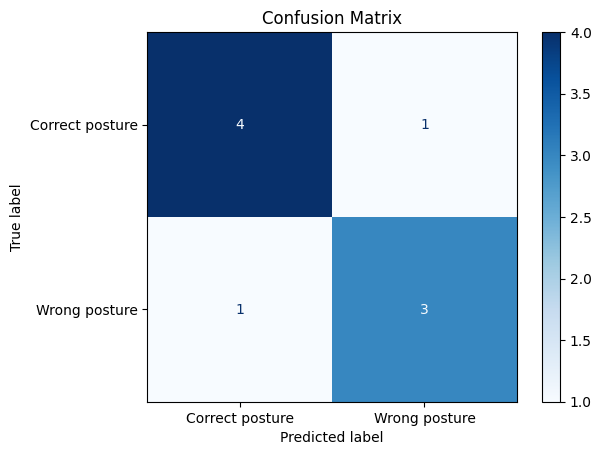


Classification Report:
                 precision    recall  f1-score   support

Correct posture       0.80      0.80      0.80         5
  Wrong posture       0.75      0.75      0.75         4

       accuracy                           0.78         9
      macro avg       0.78      0.78      0.78         9
   weighted avg       0.78      0.78      0.78         9



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example ground truth and predictions
ground_truth = [
    "Correct posture", "Wrong posture", "Correct posture",
    "Wrong posture", "Correct posture", "Wrong posture",
    "Correct posture", "Wrong posture", "Correct posture"
]

predictions = [
    "Correct posture", "Wrong posture", "Wrong posture",
    "Wrong posture", "Correct posture", "Correct posture",
    "Correct posture", "Wrong posture", "Correct posture"
]

# Calculate confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=["Correct posture", "Wrong posture"])

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Correct posture", "Wrong posture"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(ground_truth, predictions, target_names=["Correct posture", "Wrong posture"]))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Example ground truth and predictions
ground_truth = [
    "Correct posture", "Wrong posture", "Correct posture",
    "Wrong posture", "Correct posture", "Wrong posture",
    "Correct posture", "Wrong posture", "Correct posture"
]

predictions = [
    "Correct posture", "Wrong posture", "Wrong posture",
    "Wrong posture", "Correct posture", "Correct posture",
    "Correct posture", "Wrong posture", "Correct posture"
]

# Calculate performance metrics
accuracy = accuracy_score(ground_truth, predictions)
precision = precision_score(ground_truth, predictions, average='weighted')
recall = recall_score(ground_truth, predictions, average='weighted')
f1 = f1_score(ground_truth, predictions, average='weighted')

# Display performance metrics
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (weighted): {precision * 100:.2f}%")
print(f"Recall (weighted): {recall * 100:.2f}%")
print(f"F1-Score (weighted): {f1 * 100:.2f}%")




Model Performance Metrics:
Accuracy: 77.78%
Precision (weighted): 77.78%
Recall (weighted): 77.78%
F1-Score (weighted): 77.78%


# Demo

Loading image: /content/Image B.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/Image B_annotated.png
Posture analysis for /content/Image B.png: Wrong posture. Sit upright, keep your back straight, and avoid leaning forward.


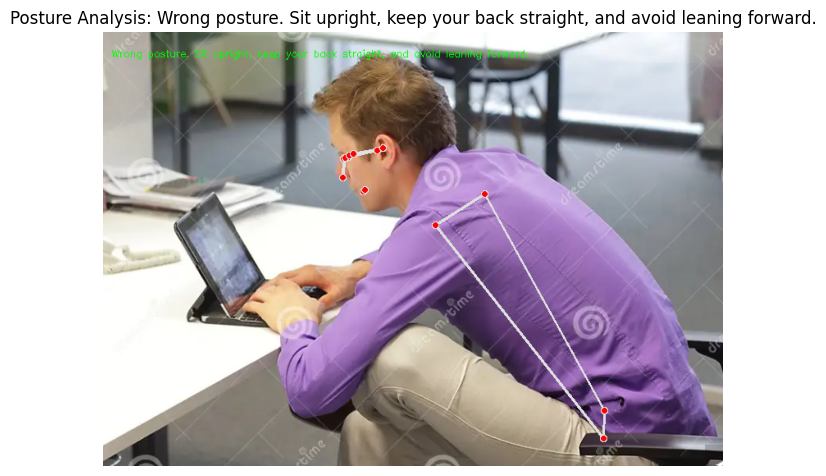

Loading image: /content/Image D.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/Image D_annotated.png
Posture analysis for /content/Image D.png: Wrong posture. Sit upright, keep your back straight, and avoid leaning forward.


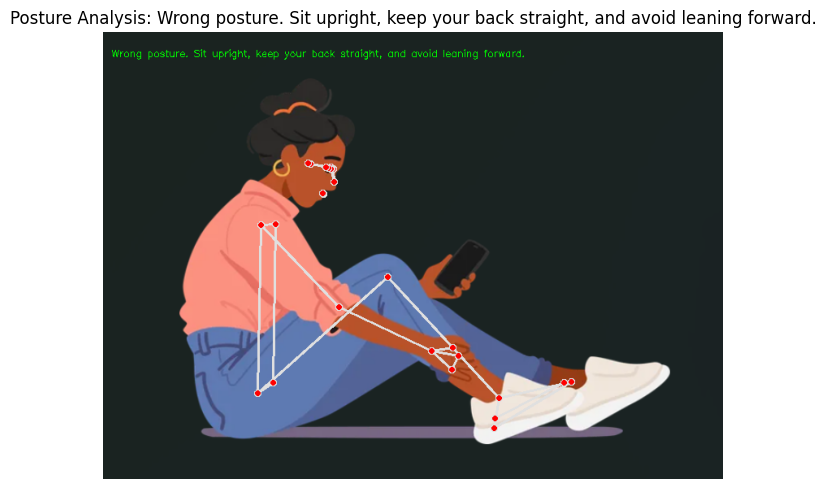

Loading image: /content/c.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/c_annotated.png
Posture analysis for /content/c.png: Correct posture


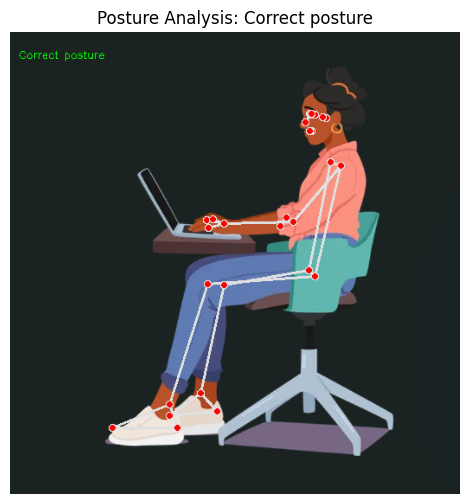

Loading image: /content/Slouching_Generated_01.png
Processing pose landmarks...
Pose landmarks detected!
Annotated image saved at: /content/Slouching_Generated_01_annotated.png
Posture analysis for /content/Slouching_Generated_01.png: Wrong posture. Sit upright, keep your back straight, and avoid leaning forward.


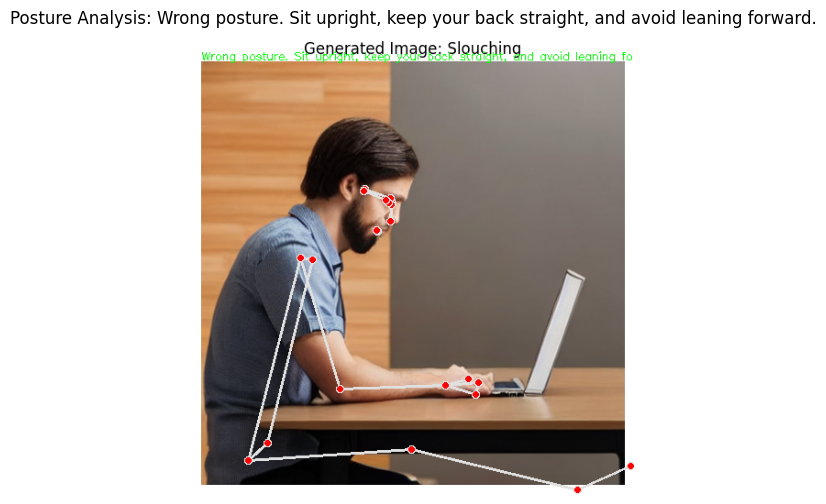

In [ ]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

def analyze_posture(image_path):
    # Load the image
    print(f"Loading image: {image_path}")
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return "Image not found or invalid", None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize MediaPipe Pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)

    # Process the image to detect pose landmarks
    print("Processing pose landmarks...")
    result = pose.process(image_rgb)
    annotated_image = image.copy()

    posture = "No human detected in the image."
    if result.pose_landmarks:
        print("Pose landmarks detected!")
        # Extract necessary points for posture analysis
        landmarks = result.pose_landmarks.landmark
        shoulder_y = (landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y +
                      landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y) / 2
        hip_y = (landmarks[mp_pose.PoseLandmark.LEFT_HIP].y +
                 landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y) / 2
        ear_y = landmarks[mp_pose.PoseLandmark.LEFT_EAR].y
        neck_angle = abs(ear_y - shoulder_y)

        # Evaluate posture
        if abs(shoulder_y - hip_y) < 0.25 and neck_angle < 0.1:
            posture = "Correct posture"
        else:
            posture = "Wrong posture. Sit upright, keep your back straight, and avoid leaning forward."

        # Draw landmarks and posture text
        mp.solutions.drawing_utils.draw_landmarks(
            annotated_image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS
        )
        cv2.putText(annotated_image, posture, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)
    else:
        print("No pose landmarks detected.")

    # Save the annotated image
    output_path = image_path.replace(".png", "_annotated.png").replace(".webp", "_annotated.png")
    cv2.imwrite(output_path, annotated_image)
    print(f"Annotated image saved at: {output_path}")

    pose.close()
    return posture, annotated_image

# Paths to the uploaded images
image_paths = [ "/content/Image B.png", "/content/Image D.png","/content/c.png","/content/Slouching_Generated_01.png"]

# Analyze posture for each image and display the results
for path in image_paths:
    result, annotated_image = analyze_posture(path)
    print(f"Posture analysis for {path}: {result}")

    if annotated_image is not None:
        # Convert BGR to RGB for Matplotlib
        annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 6))
        plt.imshow(annotated_image_rgb)
        plt.title(f"Posture Analysis: {result}")
        plt.axis('off')
        plt.show()
